In [9]:
import pandas as pd

# Base directory for the CSV files
base_directory = 'unique_IDs_csv'

# List of file names
ids = [
    28081, 44828, 30288, 236779, 253802, 34102, 277916, 290630, 234675, 232292,
    26421, 8917, 321777, 277912, 308967, 430246, 326016, 272450, 311592, 288284,
    325026, 446507, 276298, 390484, 447261, 230558, 489889, 379140, 481896,
    379143, 432783, 425943, 390481, 436757, 461632, 325012, 379504, 530011,
    422108, 554691, 398439, 446763, 497121, 625371, 477021, 471342, 625383,
    604527, 537119, 438362, 604302, 642519, 721867, 723105, 719719, 720471,
    732293, 559235, 423838, 344580, 552152, 502714, 379887, 596417, 600498,
    550215, 851403, 822553, 377534, 403902, 510530, 662973, 542023, 940973,
    926851, 793463, 714451, 931581, 669365, 820351, 669855, 670025, 823509,
    793467, 1059570, 1079434, 1079470, 802575, 853265, 1060380, 942645,
    1064812, 719715, 605661, 595267, 481979, 974087, 974109, 784379, 662235,
    892749, 777515, 694211, 823703, 805235, 1048739, 1131978, 1081442, 1132005,
    1083033, 1138316, 955235, 1070173, 917159, 1070183, 897549, 911707, 784373,
    677077, 698315, 826915, 819429, 1124283, 959767, 1079839, 1111917, 1175485,
    1161024, 1125958, 1159720, 1057399, 1161489, 1123073, 1163695, 1159711,
    1175441, 1070196, 1155253, 1170265, 1176959, 1130300, 596010, 1168641,
    696401, 974175, 1119026, 1125688, 1206052, 1159843, 1159722, 1151286,
    1182529, 1151278, 1070188, 1108375, 1125976, 1050545, 1168049, 1175488,
    778241, 1206039, 1209292, 1148776, 1175429, 1151270, 595978, 1194959,
    1207295, 1151288, 1246528, 1175496, 1252585, 777815, 778963, 1292502,
    1312645, 1194795, 1294342, 1292506, 1339031, 1175426, 1277545, 1292497,
    1175489, 1175428, 1123718, 1151273, 1244751, 1349361, 1306214, 1356971,
    1287032, 1175463, 1292495, 1403153, 1410577, 1292563, 1350792
]

# Generate the full file paths
first_csv_files = [f"{base_directory}/{file_name}.csv" for file_name in ids]


# Load the second CSV file to filter IDs
second_csv_path = 'unique_IDs_csv/BatEngg.csv'  # Replace with your actual file path
second_df = pd.read_csv(second_csv_path)

# Loop through each file in the list
for first_csv_path in first_csv_files:
    # Load the first CSV file
    first_df = pd.read_csv(first_csv_path)

    # Initialize a list to store extracted IDs for each entry
    extracted_ids_list = []

    # Loop through each entry in first_df
    for index, row in first_df.iterrows():
        match_date = row['MatchDate']  # Extract MatchDate
        ground = row['Ground']          # Extract Ground

        # Filter the second DataFrame based on MatchDate and Ground
        filtered_ids = second_df[(second_df['MatchDate'] == match_date) & 
                                  (second_df['Ground'] == ground) & 
                                  (second_df['ID'] != row['ID'])]  # Exclude the current ID

        # Extract the IDs and store them in the list as a comma-separated string
        ids = filtered_ids['ID'].tolist()
        extracted_ids_list.append(', '.join(map(str, ids)))  # Convert IDs to string and join

    # Add the new column to the first DataFrame
    first_df['Extracted_IDs'] = extracted_ids_list

    # Save the updated DataFrame to a new CSV file
    output_csv_path = f'unique_IDs_team_data/{first_csv_path.split("/")[-1]}'  # Specify your output file path
    first_df.to_csv(output_csv_path, index=False)

    print(f"New CSV file created at: {output_csv_path}")

New CSV file created at: unique_IDs_team_data/28081.csv
New CSV file created at: unique_IDs_team_data/44828.csv
New CSV file created at: unique_IDs_team_data/30288.csv
New CSV file created at: unique_IDs_team_data/236779.csv
New CSV file created at: unique_IDs_team_data/253802.csv
New CSV file created at: unique_IDs_team_data/34102.csv
New CSV file created at: unique_IDs_team_data/277916.csv
New CSV file created at: unique_IDs_team_data/290630.csv
New CSV file created at: unique_IDs_team_data/234675.csv
New CSV file created at: unique_IDs_team_data/232292.csv
New CSV file created at: unique_IDs_team_data/26421.csv
New CSV file created at: unique_IDs_team_data/8917.csv
New CSV file created at: unique_IDs_team_data/321777.csv
New CSV file created at: unique_IDs_team_data/277912.csv
New CSV file created at: unique_IDs_team_data/308967.csv
New CSV file created at: unique_IDs_team_data/430246.csv
New CSV file created at: unique_IDs_team_data/326016.csv
New CSV file created at: unique_IDs_te

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Base directory for the CSV files
base_directory = 'cleaned_csv_files'

# List of file names
ids = [
    28081, 44828, 30288, 236779, 253802, 34102, 277916, 290630, 234675, 232292,
    26421, 8917, 321777, 277912, 308967, 430246, 326016, 272450, 311592, 288284,
    325026, 446507, 276298, 390484, 447261, 230558, 489889, 379140, 481896,
    379143, 432783, 425943, 390481, 436757, 461632, 325012, 379504, 530011,
    422108, 554691, 398439, 446763, 497121, 625371, 477021, 471342, 625383,
    604527, 537119, 438362, 604302, 642519, 721867, 723105, 719719, 720471,
    732293, 559235, 423838, 344580, 552152, 502714, 379887, 596417, 600498,
    550215, 851403, 822553, 377534, 403902, 510530, 662973, 542023, 940973,
    926851, 793463, 714451, 931581, 669365, 820351, 669855, 670025, 823509,
    793467, 1059570, 1079434, 1079470, 802575, 853265, 1060380, 942645,
    1064812, 719715, 605661, 595267, 481979, 974087, 974109, 784379, 662235,
    892749, 777515, 694211, 823703, 805235, 1048739, 1131978, 1081442, 1132005,
    1083033, 1138316, 955235, 1070173, 917159, 1070183, 897549, 911707, 784373,
    677077, 698315, 826915, 819429, 1124283, 959767, 1079839, 1111917, 1175485,
    1161024, 1125958, 1159720, 1057399, 1161489, 1123073, 1163695, 1159711,
    1175441, 1070196, 1155253, 1170265, 1176959, 1130300, 596010, 1168641,
    696401, 974175, 1119026, 1125688, 1206052, 1159843, 1159722, 1151286,
    1182529, 1151278, 1070188, 1108375, 1125976, 1050545, 1168049, 1175488,
    778241, 1206039, 1209292, 1148776, 1175429, 1151270, 595978, 1194959,
    1207295, 1151288, 1246528, 1175496, 1252585, 777815, 778963, 1292502,
    1312645, 1194795, 1294342, 1292506, 1339031, 1175426, 1277545, 1292497,
    1175489, 1175428, 1123718, 1151273, 1244751, 1349361, 1306214, 1356971,
    1287032, 1175463, 1292495, 1403153, 1410577, 1292563, 1350792
]

# Generate the full file paths
csv_files = [f"{base_directory}/{file_name}.csv" for file_name in ids]

# Create a PDF file to save the plots
pdf_path = 'cleaned_fantasy_plots.pdf'  # Specify your output PDF file path
with PdfPages(pdf_path) as pdf:
    # Loop through each CSV file
    for csv_path in csv_files:
        # Load the CSV file
        df = pd.read_csv(csv_path)

        # Check if the required columns exist
        if 'Fantasy' not in df.columns or 'MatchDate' not in df.columns:
            print(f"'Fantasy' or 'MatchDate' column not found in {csv_path}. Skipping this file.")
            continue

        # Convert 'MatchDate' to datetime
        df['MatchDate'] = pd.to_datetime(df['MatchDate'])

        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for outlier detection
        Q1 = df['Fantasy'].quantile(0.25)
        Q3 = df['Fantasy'].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df['Fantasy'] < lower_bound) | (df['Fantasy'] > upper_bound)]

        # Plot the Fantasy values with MatchDate on the x-axis
        plt.figure(figsize=(12, 6))
        plt.plot(df['MatchDate'], df['Fantasy'], label='Fantasy', color='blue', marker='o', markersize=3)
        plt.scatter(outliers['MatchDate'], outliers['Fantasy'], color='red', label='Outliers', zorder=5)
        plt.title(f'Fantasy Values with Outliers for {csv_path.split("/")[-1]}')
        plt.xlabel('Match Date')
        plt.ylabel('Fantasy Points')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.legend()
        plt.grid()
        plt.tight_layout()  # Adjust layout to prevent clipping of labels

        # Save the current figure to the PDF
        pdf.savefig()  # Save the current figure into the PDF
        plt.close()  # Close the figure to free up memory

print(f"All plots have been saved to {pdf_path}.")

All plots have been saved to cleaned_fantasy_plots.pdf.


In [14]:
import pandas as pd
import os

# Base directory for the CSV files
base_directory = 'unique_IDs_team_data'

# List of file names (IDs)
ids = [
    28081, 44828, 30288, 236779, 253802, 34102, 277916, 290630, 234675, 232292,
    26421, 8917, 321777, 277912, 308967, 430246, 326016, 272450, 311592, 288284,
    325026, 446507, 276298, 390484, 447261, 230558, 489889, 379140, 481896,
    379143, 432783, 425943, 390481, 436757, 461632, 325012, 379504, 530011,
    422108, 554691, 398439, 446763, 497121, 625371, 477021, 471342, 625383,
    604527, 537119, 438362, 604302, 642519, 721867, 723105, 719719, 720471,
    732293, 559235, 423838, 344580, 552152, 502714, 379887, 596417, 600498,
    550215, 851403, 822553, 377534, 403902, 510530, 662973, 542023, 940973,
    926851, 793463, 714451, 931581, 669365, 820351, 669855, 670025, 823509,
    793467, 1059570, 1079434, 1079470, 802575, 853265, 1060380, 942645,
    1064812, 719715, 605661, 595267, 481979, 974087, 974109, 784379, 662235,
    892749, 777515, 694211, 823703, 805235, 1048739, 1131978, 1081442, 1132005,
    1083033, 1138316, 955235, 1070173, 917159, 1070183, 897549, 911707, 784373,
    677077, 698315, 826915, 819429, 1124283, 959767, 1079839, 1111917, 1175485,
    1161024, 1125958, 1159720, 1057399, 1161489, 1123073, 1163695, 1159711,
    1175441, 1070196, 1155253, 1170265, 1176959, 1130300, 596010, 1168641,
    696401, 974175, 1119026, 1125688, 1206052, 1159843, 1159722, 1151286,
    1182529, 1151278, 1070188, 1108375, 1125976, 1050545, 1168049, 1175488,
    778241, 1206039, 1209292, 1148776, 1175429, 1151270, 595978, 1194959,
    1207295, 1151288, 1246528, 1175496, 1252585, 777815, 778963, 1292502,
    1312645, 1194795, 1294342, 1292506, 1339031, 1175426, 1277545, 1292497,
    1175489, 1175428, 1123718, 1151273, 1244751, 1349361, 1306214, 1356971,
    1287032, 1175463, 1292495, 1403153, 1410577, 1292563, 1350792
]

# Generate the full file paths
csv_files = [f"{base_directory}/{file_name}.csv" for file_name in ids]

# Create a directory to save the cleaned CSV files
output_directory = 'cleaned_csv_files'
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Loop through each CSV file
for csv_path in csv_files:
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Check if the required columns exist
    if 'Fantasy' not in df.columns or 'MatchDate' not in df.columns:
        print(f"'Fantasy' or 'MatchDate' column not found in {csv_path}. Skipping this file.")
        continue

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for outlier detection
    Q1 = df['Fantasy'].quantile(0.25)
    Q3 = df['Fantasy'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['Fantasy'] < lower_bound) | (df['Fantasy'] > upper_bound)]

    # Remove outliers from the DataFrame
    cleaned_df = df[~df.index.isin(outliers.index)]

    # Save the cleaned DataFrame to a new CSV file
    output_csv_path = f"{output_directory}/{os.path.basename(csv_path)}"  # Keep the same file name
    cleaned_df.to_csv(output_csv_path, index=False)

    print(f"Cleaned CSV file created at: {output_csv_path}")

Cleaned CSV file created at: cleaned_csv_files/28081.csv
Cleaned CSV file created at: cleaned_csv_files/44828.csv
Cleaned CSV file created at: cleaned_csv_files/30288.csv
Cleaned CSV file created at: cleaned_csv_files/236779.csv
Cleaned CSV file created at: cleaned_csv_files/253802.csv
Cleaned CSV file created at: cleaned_csv_files/34102.csv
Cleaned CSV file created at: cleaned_csv_files/277916.csv
Cleaned CSV file created at: cleaned_csv_files/290630.csv
Cleaned CSV file created at: cleaned_csv_files/234675.csv
Cleaned CSV file created at: cleaned_csv_files/232292.csv
Cleaned CSV file created at: cleaned_csv_files/26421.csv
Cleaned CSV file created at: cleaned_csv_files/8917.csv
Cleaned CSV file created at: cleaned_csv_files/321777.csv
Cleaned CSV file created at: cleaned_csv_files/277912.csv
Cleaned CSV file created at: cleaned_csv_files/308967.csv
Cleaned CSV file created at: cleaned_csv_files/430246.csv
Cleaned CSV file created at: cleaned_csv_files/326016.csv
Cleaned CSV file crea

In [16]:
import pandas as pd
import os

# Base directory for the CSV files
base_directory = 'cleaned_csv_files'

# List of file names (IDs)
ids = [
    28081, 44828, 30288, 236779, 253802, 34102, 277916, 290630, 234675, 232292,
    26421, 8917, 321777, 277912, 308967, 430246, 326016, 272450, 311592, 288284,
    325026, 446507, 276298, 390484, 447261, 230558, 489889, 379140, 481896,
    379143, 432783, 425943, 390481, 436757, 461632, 325012, 379504, 530011,
    422108, 554691, 398439, 446763, 497121, 625371, 477021, 471342, 625383,
    604527, 537119, 438362, 604302, 642519, 721867, 723105, 719719, 720471,
    732293, 559235, 423838, 344580, 552152, 502714, 379887, 596417, 600498,
    550215, 851403, 822553, 377534, 403902, 510530, 662973, 542023, 940973,
    926851, 793463, 714451, 931581, 669365, 820351, 669855, 670025, 823509,
    793467, 1059570, 1079434, 1079470, 802575, 853265, 1060380, 942645,
    1064812, 719715, 605661, 595267, 481979, 974087, 974109, 784379, 662235,
    892749, 777515, 694211, 823703, 805235, 1048739, 1131978, 1081442, 1132005,
    1083033, 1138316, 955235, 1070173, 917159, 1070183, 897549, 911707, 784373,
    677077, 698315, 826915, 819429, 1124283, 959767, 1079839, 1111917, 1175485,
    1161024, 1125958, 1159720, 1057399, 1161489, 1123073, 1163695, 1159711,
    1175441, 1070196, 1155253, 1170265, 1176959, 1130300, 596010, 1168641,
    696401, 974175, 1119026, 1125688, 1206052, 1159843, 1159722, 1151286,
    1182529, 1151278, 1070188, 1108375, 1125976, 1050545, 1168049, 1175488,
    778241, 1206039, 1209292, 1148776, 1175429, 1151270, 595978, 1194959,
    1207295, 1151288, 1246528, 1175496, 1252585, 777815, 778963, 1292502,
    1312645, 1194795, 1294342, 1292506, 1339031, 1175426, 1277545, 1292497,
    1175489, 1175428, 1123718, 1151273, 1244751, 1349361, 1306214, 1356971,
    1287032, 1175463, 1292495, 1403153, 1410577, 1292563, 1350792
]

# Generate the full file paths
csv_files = [f"{base_directory}/{file_name}.csv" for file_name in ids]

# Initialize a list to hold DataFrames
dataframes = []

# Loop through each CSV file
for csv_path in csv_files:
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Check if the required columns exist
    if 'Fantasy' not in df.columns or 'MatchDate' not in df.columns:
        print(f"'Fantasy' or 'MatchDate' column not found in {csv_path}. Skipping this file.")
        continue

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'MatchDate' to datetime
combined_df['MatchDate'] = pd.to_datetime(combined_df['MatchDate'])

# Sort the combined DataFrame by 'MatchDate'
combined_df.sort_values(by='MatchDate', inplace=True)

# Save the combined DataFrame to a new CSV file
output_csv_path = 'cleaned_fantasy_data.csv'  # Specify your output file path
combined_df.to_csv(output_csv_path, index=False)

print(f"Combined CSV file created at: {output_csv_path}")

Combined CSV file created at: cleaned_fantasy_data.csv


/var/folders/_w/4xfs9wld05nfzlbq4p03y6z80000gn/T/ipykernel_17185/1932199065.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_ids['Year'] = empty_ids['MatchDate'].dt.year


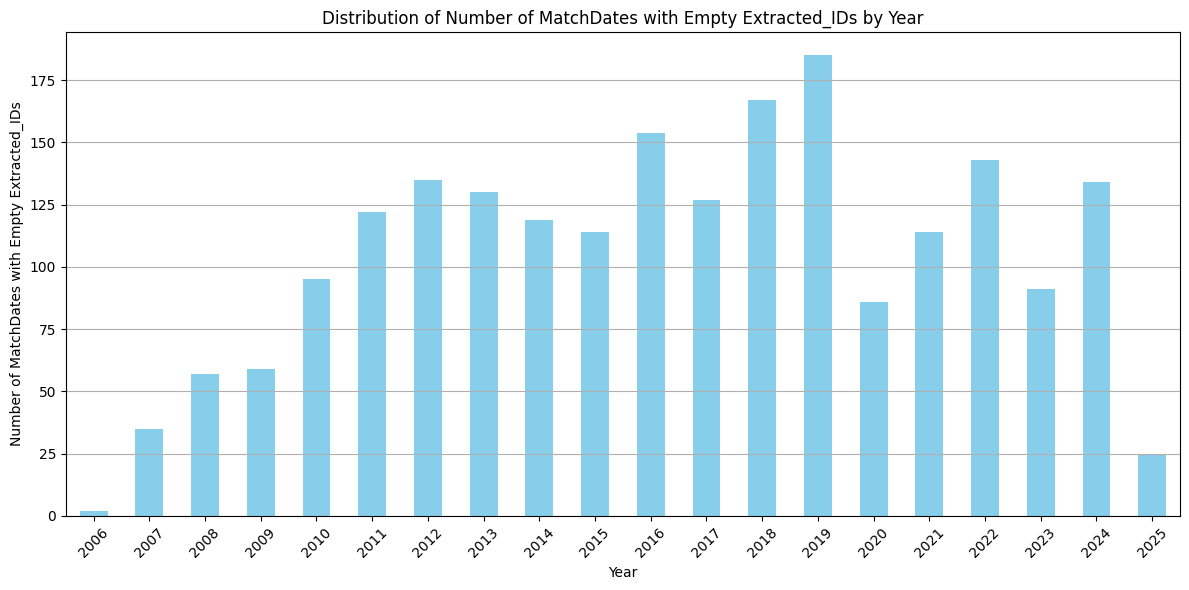

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'cleaned_fantasy_data.csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'MatchDate' not in df.columns or 'Extracted_IDs' not in df.columns:
    print("'MatchDate' or 'Extracted_IDs' column not found in the CSV file.")
else:
    # Convert 'MatchDate' to datetime
    df['MatchDate'] = pd.to_datetime(df['MatchDate'])

    # Filter the DataFrame for rows where Extracted_IDs is empty
    empty_ids = df[df['Extracted_IDs'].isnull() | (df['Extracted_IDs'] == '')]

    # Extract the year from MatchDate
    empty_ids['Year'] = empty_ids['MatchDate'].dt.year

    # Group by year and count the number of entries with empty Extracted_IDs
    distribution = empty_ids.groupby('Year').size()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Number of MatchDates with Empty Extracted_IDs by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of MatchDates with Empty Extracted_IDs')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

The last 40 MatchDates with empty Extracted_IDs are:
['2024-10-19', '2024-10-19', '2024-10-19', '2024-10-20', '2024-10-22', '2024-10-23', '2024-10-27', '2024-11-25', '2024-12-01', '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-21', '2024-12-31', '2025-01-01', '2025-01-03', '2025-01-03', '2025-01-07', '2025-01-10', '2025-01-11', '2025-01-13', '2025-01-15', '2025-01-15', '2025-01-16', '2025-01-16', '2025-01-17', '2025-01-18', '2025-01-18', '2025-01-19', '2025-01-19', '2025-01-20', '2025-01-23', '2025-01-23', '2025-01-25', '2025-01-26', '2025-01-26', '2025-01-28', '2025-01-29', '2025-02-02']


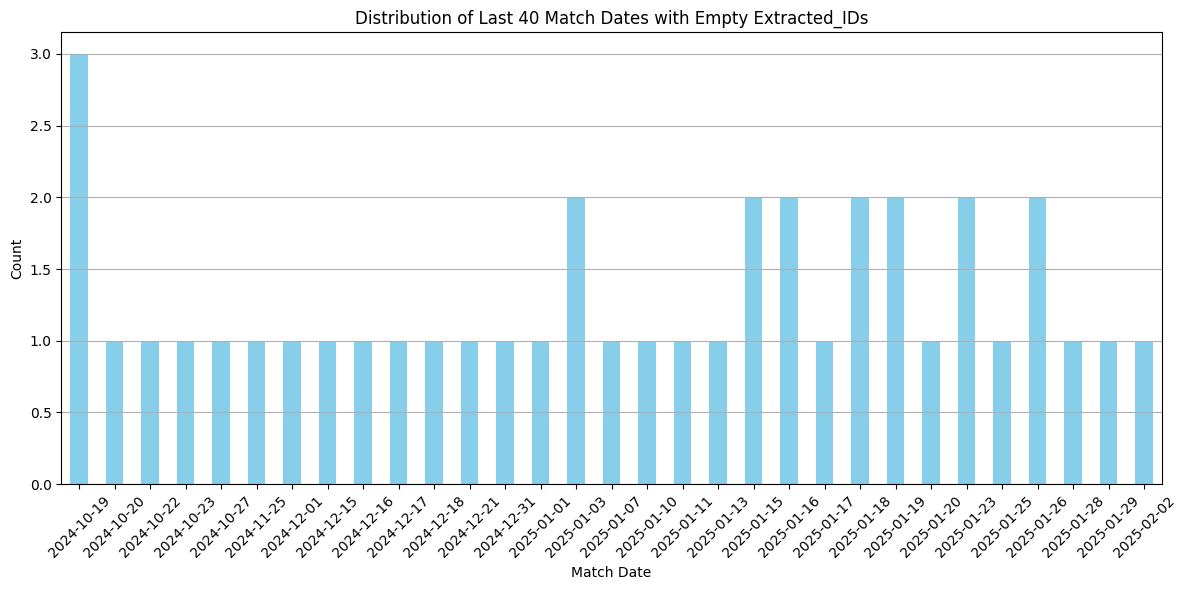

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'cleaned_fantasy_data.csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'MatchDate' not in df.columns or 'Extracted_IDs' not in df.columns:
    print("'MatchDate' or 'Extracted_IDs' column not found in the CSV file.")
else:
    # Filter the DataFrame for rows where Extracted_IDs is empty
    empty_ids = df[df['Extracted_IDs'].isnull() | (df['Extracted_IDs'] == '')]

    # Get the last 40 MatchDates where Extracted_IDs is empty
    if not empty_ids.empty:
        last_empty_dates = empty_ids['MatchDate'].iloc[-40:]  # Get the last 40 MatchDates
        print("The last 40 MatchDates with empty Extracted_IDs are:")
        print(last_empty_dates.tolist())  # Convert to list for better readability

        # Plot the distribution of the last 40 MatchDates
        plt.figure(figsize=(12, 6))
        last_empty_dates.value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title('Distribution of Last 40 Match Dates with Empty Extracted_IDs')
        plt.xlabel('Match Date')
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(axis='y')
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.show()
    else:
        print("No rows found with empty Extracted_IDs.")

In [24]:
import pandas as pd

# Load the old CSV file (replace with your actual file path)
old_csv_path = 'cleaned_fantasy_data.csv'  # Replace with your actual file path
df = pd.read_csv(old_csv_path)

# Check if the required column exists
if 'MatchDate' not in df.columns:
    print("'MatchDate' column not found in the CSV file.")
else:
    # Convert 'MatchDate' to datetime
    df['MatchDate'] = pd.to_datetime(df['MatchDate'])

    # Filter the DataFrame for entries after January 1, 2021
    filtered_df = df[df['MatchDate'] > '2020-01-01']

    # Save the filtered DataFrame to a new CSV file
    new_csv_path = 'cleaned_fantasy_data_2020.csv'  # Specify your output file path
    filtered_df.to_csv(new_csv_path, index=False)

    print(f"New CSV file created at: {new_csv_path}")

New CSV file created at: cleaned_fantasy_data_2020.csv


In [26]:
import pandas as pd

# Load the CSV file (replace with your actual file path)
csv_path = 'cleaned_fantasy_data_2020.csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required column exists
if 'Played_together' not in df.columns:
    print("'Played_together' column not found in the CSV file.")
else:
    # Handle empty cases by replacing NaN or empty strings with a placeholder
    df['Played_together'].fillna('None', inplace=True)  # Replace NaN with 'None'
    df['Played_together'].replace('', 'None', inplace=True)  # Replace empty strings with 'None'

    # Split the entries into lists
    df['Played_together'] = df['Played_together'].apply(lambda x: x.split(', ') if x != 'None' else [])

    # Create a one-hot encoding for the IDs
    # Explode the lists into separate rows
    exploded_df = df.explode('Played_together')

    # Create one-hot encoding
    one_hot = pd.get_dummies(exploded_df['Played_together'], prefix='ID')

    # Group by the original index and sum the one-hot encoded values
    one_hot_grouped = one_hot.groupby(exploded_df.index).sum()

    # Combine the original DataFrame with the one-hot encoded DataFrame
    final_df = pd.concat([df, one_hot_grouped], axis=1)

    # Optionally, drop the original 'Played_together' column if no longer needed
    final_df.drop(columns=['Played_together'], inplace=True)

    # Save the final DataFrame to a new CSV file
    output_csv_path = 'encoded_file.csv'  # Specify your output file path
    final_df.to_csv(output_csv_path, index=False)

    print(f"New CSV file with one-hot encoding created at: {output_csv_path}")

/var/folders/_w/4xfs9wld05nfzlbq4p03y6z80000gn/T/ipykernel_17185/897357918.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Played_together'].fillna('None', inplace=True)  # Replace NaN with 'None'


New CSV file with one-hot encoding created at: encoded_file.csv
